In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
os.chdir('/Users/benx/Documents/PythonCodes/AstronomicalData/HabitableWorlds') #Reemplazar con directorio adecuado

%matplotlib inline


conservative = pd.read_csv('conservative_hab_worlds.csv',  sep=',')


In [2]:
conservative.head()

,Unnamed: 0,Name,Type,Detection Method,Mass,Radius,Flux,T_surf,Period,Distance,Age,ESI
0,1,Teegarden's Star b,M Warm Terran,Radial Velocity,>= 1.05,∼1.02,1.15,∼297,4.91,12.5,> 8.00,0.95
1,2,TOI-700 d,M Warm Terran,Transit,∼1.25,1.07,0.86,∼276,37.40,101.0,> 1.50,0.94
2,3,Kepler- 1649 c,M Warm Terran,Transit,∼1.20,1.06,1.23,∼302,19.50,300.0,NaN,0.93
3,4,TOI-700 e (N ),M Warm Terran,Transit,∼0.82,0.95,1.28,∼305,27.80,101.0,> 1.50,0.91
4,5,TRAPPIST-1 d,M Warm Subterran,Transit,0.39,0.79,1.12,∼295,4.05,40.5,> 0.50,0.91


In [3]:
conservative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        29 non-null     int64  
 1   Name              29 non-null     object 
 2   Type              29 non-null     object 
 3   Detection Method  29 non-null     object 
 4   Mass              29 non-null     object 
 5   Radius            29 non-null     object 
 6   Flux              29 non-null     float64
 7   T_surf            29 non-null     object 
 8   Period            29 non-null     float64
 9   Distance          29 non-null     float64
 10  Age               22 non-null     object 
 11  ESI               29 non-null     float64
dtypes: float64(4), int64(1), object(7)
memory usage: 2.8+ KB


## Vemos que muchas columnas tienen simbolos. Estos simbolos son un problema si queremos usar los datos para análisis numéricos, por lo tanto debemos limpiarlo. En un DF pequeño se puede hacer manualmente, pero si nos enfrentamos a datos muy amplios, hay que automatizarlo: 

In [4]:
import re
# Función para limpiar los valores
def limpiar_valor(valor):
    if isinstance(valor, str):  # Verificar si el valor es una cadena
        digitos = re.findall(r'\d+\.\d+|\d+', valor)
        if digitos:
            return float(digitos[0])  # Convertir a float en lugar de devolver una cadena
    return None
x = '>f48987.909098' #estas son variables para probar el método
y = 876
limpiar_valor(x)

48987.909098

In [7]:
# Aplicar la función de limpieza a las columnas especificadas
for columna in columnas_por_limpiar:
    conservative[columna] = conservative[columna].apply(limpiar_valor)

# Convertir las columnas limpiadas a tipo numérico
conservative[columnas_por_limpiar] = conservative[columnas_por_limpiar].apply(pd.to_numeric)

conservative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        29 non-null     int64  
 1   Name              29 non-null     object 
 2   Type              29 non-null     object 
 3   Detection Method  29 non-null     object 
 4   Mass              29 non-null     float64
 5   Radius            29 non-null     float64
 6   Flux              29 non-null     float64
 7   T_surf            29 non-null     float64
 8   Period            29 non-null     float64
 9   Distance          29 non-null     float64
 10  Age               22 non-null     float64
 11  ESI               29 non-null     float64
dtypes: float64(8), int64(1), object(3)
memory usage: 2.8+ KB


In [6]:
columnas_por_limpiar = ['Mass','Radius','T_surf','Age']

In [8]:
conservative.describe()

,Unnamed: 0,Mass,Radius,Flux,T_surf,Period,Distance,Age,ESI
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,22.000000,29.000000
mean,15.000000,3.696552,1.215172,0.793448,263.206897,38.068621,221.917241,4.060000,0.799310
std,8.514693,7.481803,0.218871,0.393785,35.750504,53.978687,339.563939,2.715732,0.116034
min,1.000000,0.390000,0.790000,0.250000,203.000000,4.050000,4.200000,0.500000,0.580000
25%,8.000000,1.110000,1.040000,0.410000,229.000000,10.300000,15.800000,1.625000,0.680000
50%,15.000000,1.640000,1.160000,0.700000,263.000000,19.300000,40.500000,3.860000,0.850000
75%,22.000000,2.700000,1.410000,1.120000,295.000000,38.100000,216.000000,6.975000,0.860000
max,29.000000,35.000000,1.600000,1.480000,316.000000,267.000000,1193.000000,8.000000,0.950000


In [9]:
conservative.head()

,Unnamed: 0,Name,Type,Detection Method,Mass,Radius,Flux,T_surf,Period,Distance,Age,ESI
0,1,Teegarden's Star b,M Warm Terran,Radial Velocity,1.05,1.02,1.15,297.0,4.91,12.5,8.0,0.95
1,2,TOI-700 d,M Warm Terran,Transit,1.25,1.07,0.86,276.0,37.40,101.0,1.5,0.94
2,3,Kepler- 1649 c,M Warm Terran,Transit,1.20,1.06,1.23,302.0,19.50,300.0,NaN,0.93
3,4,TOI-700 e (N ),M Warm Terran,Transit,0.82,0.95,1.28,305.0,27.80,101.0,1.5,0.91
4,5,TRAPPIST-1 d,M Warm Subterran,Transit,0.39,0.79,1.12,295.0,4.05,40.5,0.5,0.91


In [10]:
conservative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        29 non-null     int64  
 1   Name              29 non-null     object 
 2   Type              29 non-null     object 
 3   Detection Method  29 non-null     object 
 4   Mass              29 non-null     float64
 5   Radius            29 non-null     float64
 6   Flux              29 non-null     float64
 7   T_surf            29 non-null     float64
 8   Period            29 non-null     float64
 9   Distance          29 non-null     float64
 10  Age               22 non-null     float64
 11  ESI               29 non-null     float64
dtypes: float64(8), int64(1), object(3)
memory usage: 2.8+ KB


In [11]:
conservative = conservative.drop('Unnamed: 0',axis=1)
df_filtrado_col = conservative.dropna(thresh=29, axis=1)
conservative = df_filtrado_col

In [12]:
df_filtrado_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              29 non-null     object 
 1   Type              29 non-null     object 
 2   Detection Method  29 non-null     object 
 3   Mass              29 non-null     float64
 4   Radius            29 non-null     float64
 5   Flux              29 non-null     float64
 6   T_surf            29 non-null     float64
 7   Period            29 non-null     float64
 8   Distance          29 non-null     float64
 9   ESI               29 non-null     float64
dtypes: float64(7), object(3)
memory usage: 2.4+ KB


In [13]:
columnas_a_estandarizar = ['Mass','Radius','Flux','T_surf', 'Period','Distance']

In [15]:
#como las columnas numéricas son una rebanada del df original, usamos el atributo .loc
#que ayuda a evitar ambigüedades y garantiza que las operaciones se realicen en el DF original 
conservative.loc[:, columnas_a_estandarizar] = scaler.fit_transform(conservative.loc[:, columnas_a_estandarizar]) 

In [16]:
conservative.head()

,Name,Type,Detection Method,Mass,Radius,Flux,T_surf,Period,Distance,ESI
0,Teegarden's Star b,M Warm Terran,Radial Velocity,-0.359993,-0.907508,0.921476,0.961980,-0.625164,-0.627640,0.95
1,TOI-700 d,M Warm Terran,Transit,-0.332788,-0.675019,0.171997,0.364178,-0.012606,-0.362399,0.94
2,Kepler- 1649 c,M Warm Terran,Transit,-0.339590,-0.721517,1.128228,1.104313,-0.350088,0.234020,0.93
3,TOI-700 e (N ),M Warm Terran,Transit,-0.391278,-1.232993,1.257449,1.189714,-0.193602,-0.362399,0.91
4,TRAPPIST-1 d,M Warm Subterran,Transit,-0.449768,-1.976957,0.843943,0.905046,-0.641378,-0.543722,0.91


In [18]:
conservative.to_csv('hab_worlds_clean_conservative.csv', index=False)

In [23]:
conservative['Type'].describe()

count                29
unique                3
top       M Warm Terran
freq                 26
Name: Type, dtype: object

In [20]:
conservative['Detection Method'].unique()

array(['Radial Velocity', 'Transit'], dtype=object)

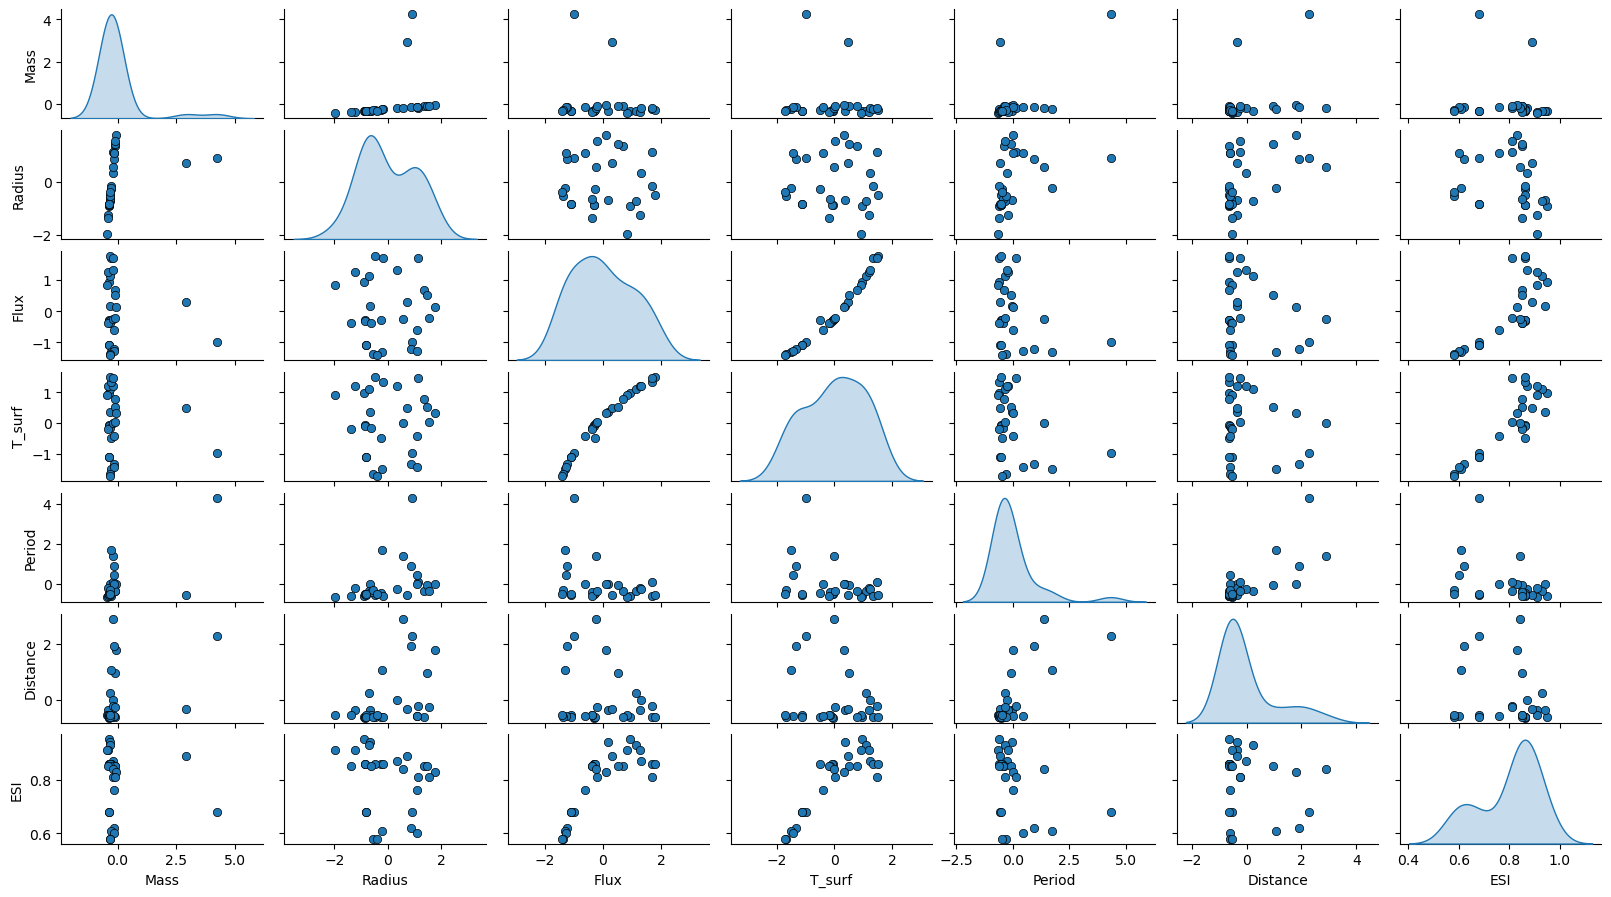

In [25]:
pp = sns.pairplot(conservative, height=1.3, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5),
    diag_kind="kde", diag_kws=dict(shade=True))#, hue='Detection Method', palette=color_map_detection)

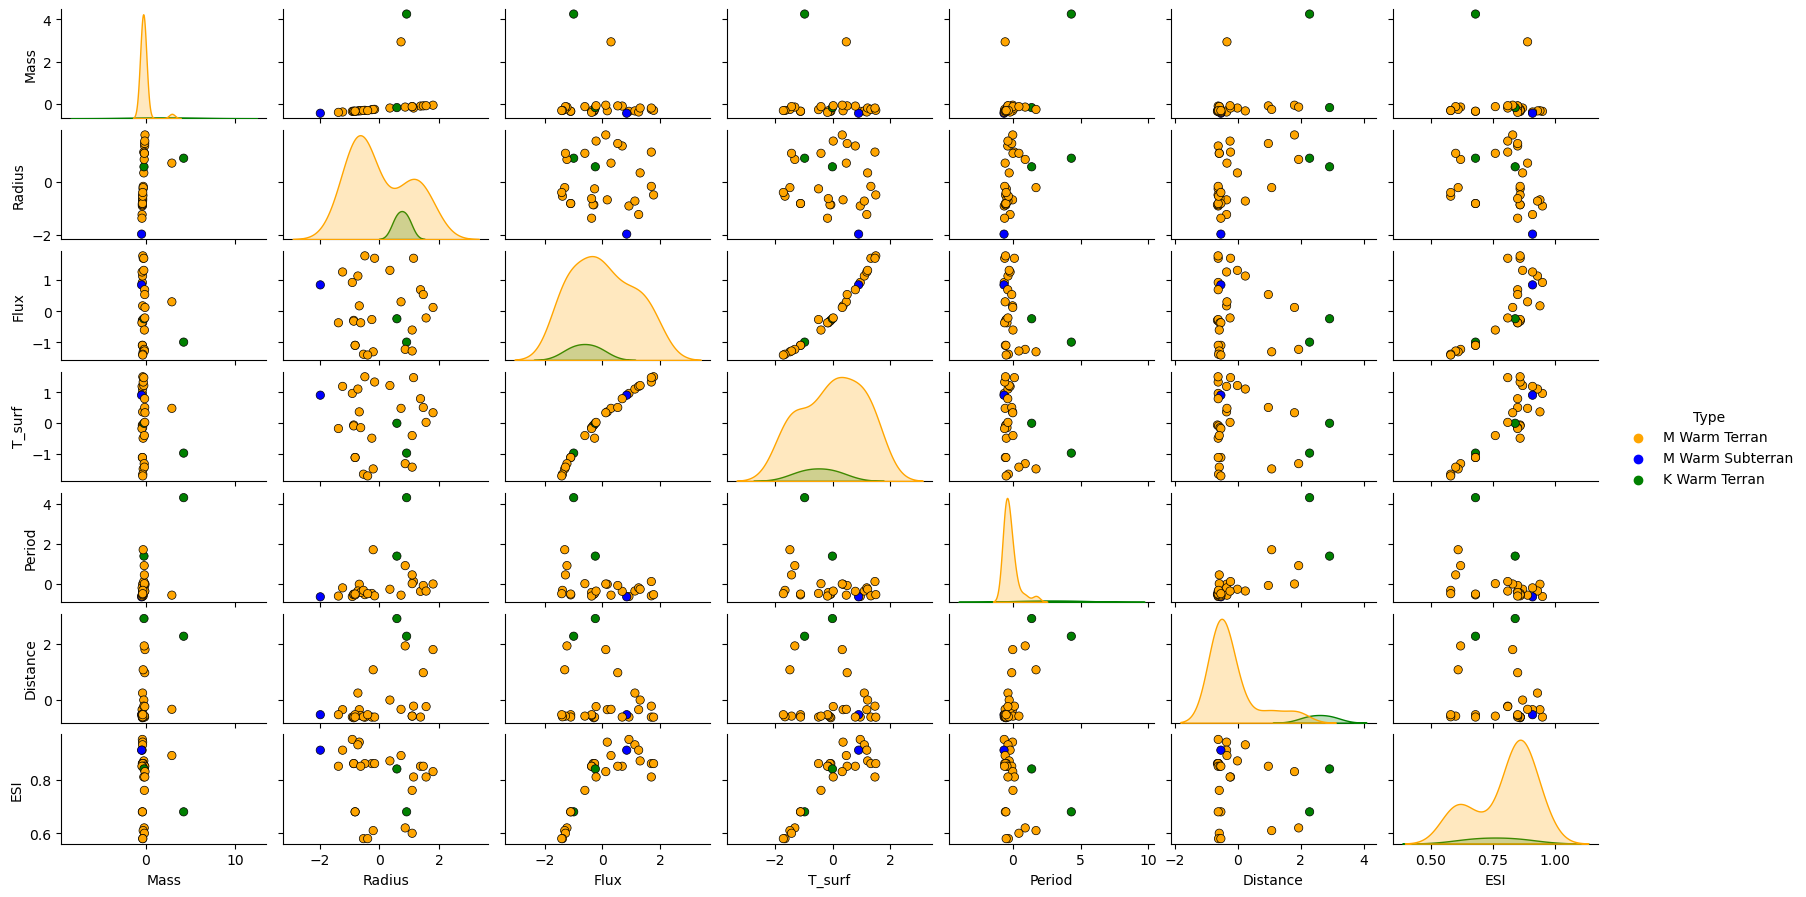

In [22]:
import warnings

# Silenciar FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

#creamos el pairplot, especificando las columnas numéricas + la columna de separación "hue"
type_hue = ['Mass','Radius','Flux','T_surf', 'Period','Distance','ESI', 'Type']
color_map_type = {
    'M Warm Terran': 'orange',
    'M Warm Subterran': 'blue',
    'K Warm Terran': 'green'
}
pp = sns.pairplot(conservative[type_hue], height=1.3, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5),
    diag_kind="kde", diag_kws=dict(shade=True), hue='Type', palette=color_map_type)

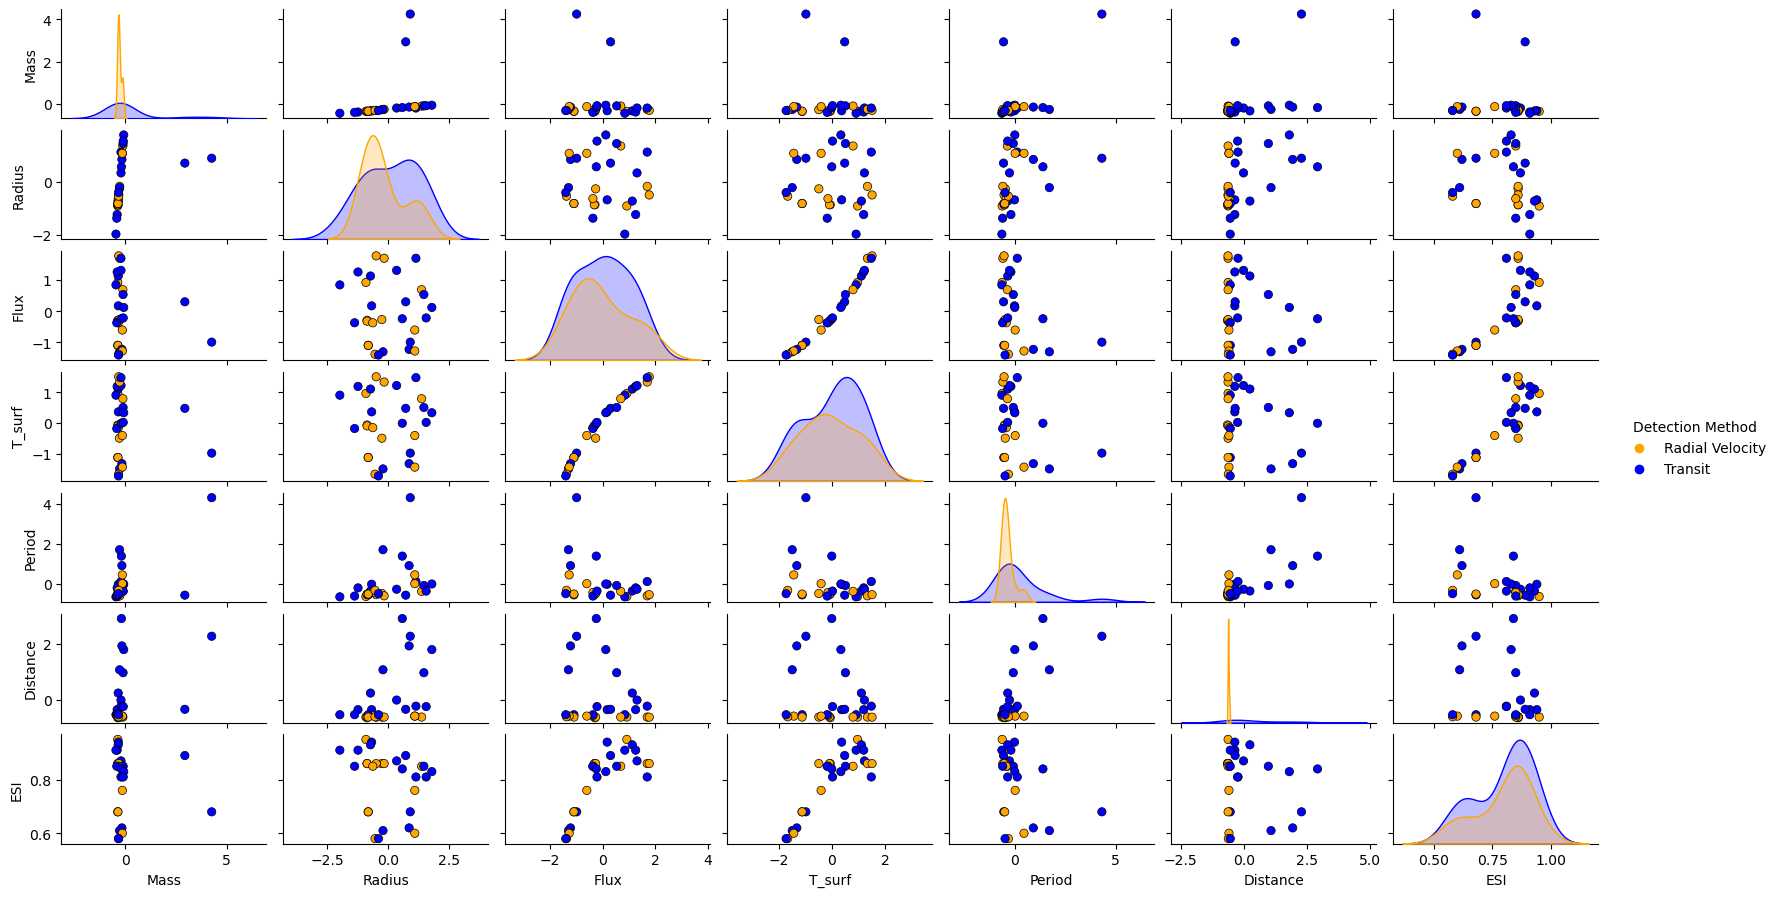

In [24]:
import warnings

# Silenciar FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

#creamos el pairplot, especificando las columnas numéricas + la columna de separación "hue"
detection_hue = ['Mass','Radius','Flux','T_surf', 'Period','Distance','ESI', 'Detection Method']
color_map_detection = {
    'Radial Velocity': 'orange',
    'Transit': 'blue'
}
pp = sns.pairplot(conservative[detection_hue], height=1.3, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5),
    diag_kind="kde", diag_kws=dict(shade=True), hue='Detection Method', palette=color_map_detection)